In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!unzip -q "/content/drive/MyDrive/Colab Notebooks/Car-Detection.v2i.yolov8.zip" -d /content/car_data


In [ ]:
!ls /content/car_data


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
from ultralytics import YOLO

# Load YOLOv8 small model
model = YOLO('yolov8n.pt')

# Train
model.train(
    data='/content/car_data/data.yaml',
    epochs=50,
    imgsz=640,
    batch=8
)

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/car_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e756e3342c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
model = YOLO("runs/detect/train/weights/best.pt")


In [ ]:
results = model.val()  # ya model.val(data="data.yaml")


Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 870.5±284.1 MB/s, size: 44.5 KB)
val: Scanning /content/car_data/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 21/21 17.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.7it/s 1.1s
                   all         21         26          1      0.844      0.907      0.728
Speed: 18.8ms preprocess, 6.2ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /content/runs/detect/val2


In [ ]:
# 2️⃣ Import libraries
from ultralytics import YOLO
from google.colab import files
from IPython.display import Image, display


In [ ]:
# 3️⃣ Upload your image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print("✅ Uploaded Image:", image_path)

Saving images (5).jpeg to images (5).jpeg
✅ Uploaded Image: images (5).jpeg


In [ ]:
# 4️⃣ Load your trained YOLOv8 model
# Change the path if your best.pt is in a different location
model = YOLO("runs/detect/train/weights/best.pt")

In [ ]:
# 5️⃣ Run detection
results = model.predict(source=image_path)


image 1/1 /content/images (5).jpeg: 416x640 1 Car, 40.3ms
Speed: 1.6ms preprocess, 40.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


In [ ]:
# Annotated image path automatically returned by YOLO
annotated_path = results[0].plot()  # Returns image as numpy array

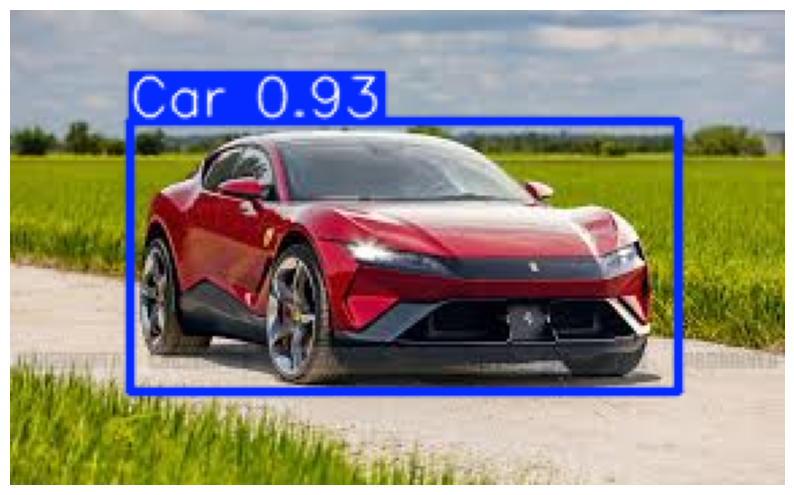

In [ ]:
# Display in Colab
import cv2
import matplotlib.pyplot as plt

# Convert BGR to RGB for correct colors
annotated_rgb = cv2.cvtColor(annotated_path, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.show()

In [ ]:
# Print detected objects with confidence
class_names = model.names
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    print(f"Detected object: {class_names[cls_id]} | Confidence: {conf:.2f}")

Detected object: Car | Confidence: 0.93


In [ ]:
from google.colab import files
uploaded = files.upload()  # Car.jpg upload karo
image_path = list(uploaded.keys())[0]  # Jo bhi upload hui, uska name
print("Uploaded:", image_path)


Saving car.jpg.jpg to car.jpg (1).jpg
Uploaded: car.jpg (1).jpg


In [ ]:
results = model.predict(source=image_path)



image 1/1 /content/car.jpg (1).jpg: 448x640 1 Car, 64.0ms
Speed: 4.0ms preprocess, 64.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


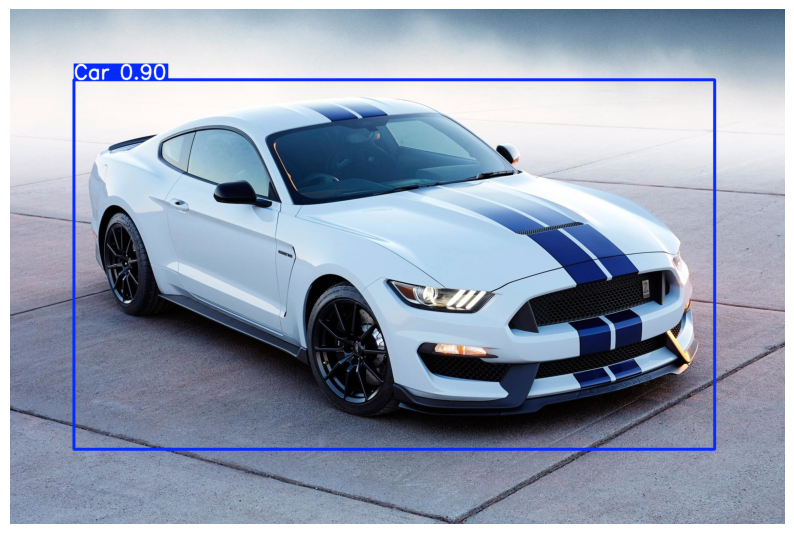

In [ ]:
import matplotlib.pyplot as plt
import cv2

annotated_img = results[0].plot()  # YOLO ne detect karke plot banaya
annotated_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.show()


In [ ]:
class_names = model.names
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    print(f"Detected object: {class_names[cls_id]} | Confidence: {conf:.2f}")


Detected object: Car | Confidence: 0.90


In [ ]:
from google.colab import files
uploaded = files.upload()  # Car.jpg upload karo
image_path = list(uploaded.keys())[0]  # Jo bhi upload hui, uska name
print("Uploaded:", image_path)


Saving carrr.jpeg to carrr.jpeg
Uploaded: carrr.jpeg


In [ ]:
results = model.predict(source=image_path)



image 1/1 /content/carrr.jpeg: 640x416 1 Car, 41.3ms
Speed: 3.1ms preprocess, 41.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


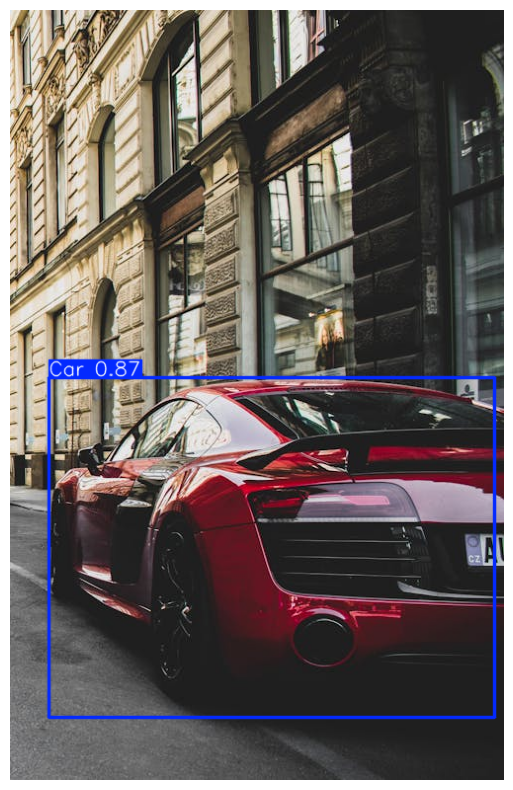

In [ ]:
import matplotlib.pyplot as plt
import cv2

annotated_img = results[0].plot()  # YOLO ne detect karke plot banaya
annotated_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.show()


In [ ]:
class_names = model.names
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    print(f"Detected object: {class_names[cls_id]} | Confidence: {conf:.2f}")


Detected object: Car | Confidence: 0.87


In [ ]:
from google.colab import files
uploaded = files.upload()  # Car.jpg upload karo
image_path = list(uploaded.keys())[0]  # Jo bhi upload hui, uska name
print("Uploaded:", image_path)


Saving car2.jpeg to car2.jpeg
Uploaded: car2.jpeg


In [ ]:
results = model.predict(source=image_path)



image 1/1 /content/car2.jpeg: 384x640 1 Car, 41.2ms
Speed: 2.0ms preprocess, 41.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


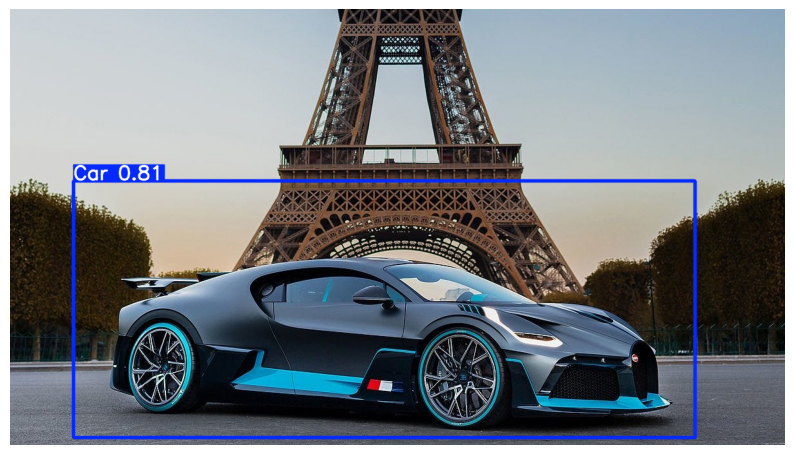

In [ ]:
import matplotlib.pyplot as plt
import cv2

annotated_img = results[0].plot()  # YOLO ne detect karke plot banaya
annotated_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.show()


In [ ]:
class_names = model.names
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    print(f"Detected object: {class_names[cls_id]} | Confidence: {conf:.2f}")


Detected object: Car | Confidence: 0.81


In [ ]:
from google.colab import files
uploaded = files.upload()  # Car.jpg upload karo
image_path = list(uploaded.keys())[0]  # Jo bhi upload hui, uska name
print("Uploaded:", image_path)


Saving carss.jpeg to carss.jpeg
Uploaded: carss.jpeg


In [ ]:
results = model.predict(source=image_path)



image 1/1 /content/carss.jpeg: 384x640 2 Cars, 9.2ms
Speed: 5.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


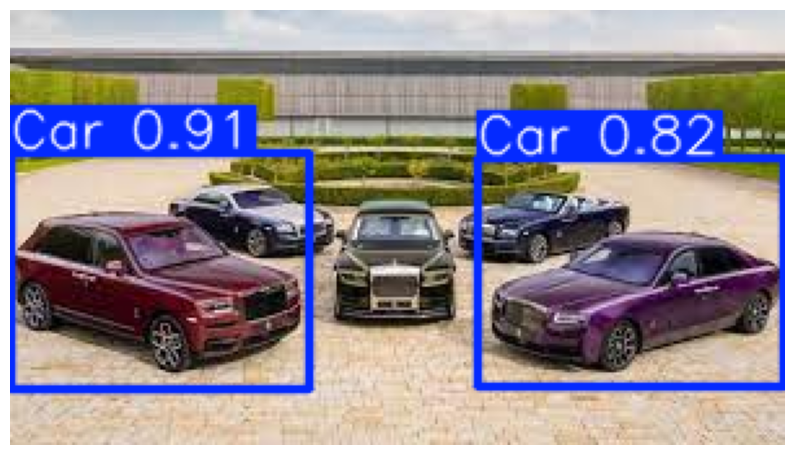

In [ ]:
import matplotlib.pyplot as plt
import cv2

annotated_img = results[0].plot()  # YOLO ne detect karke plot banaya
annotated_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.show()


In [ ]:
class_names = model.names
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    print(f"Detected object: {class_names[cls_id]} | Confidence: {conf:.2f}")


Detected object: Car | Confidence: 0.91
Detected object: Car | Confidence: 0.82


In [ ]:
from google.colab import files
uploaded = files.upload()  # Car.jpg upload karo
image_path = list(uploaded.keys())[0]  # Jo bhi upload hui, uska name
print("Uploaded:", image_path)


Saving carr1.jpg to carr1.jpg
Uploaded: carr1.jpg


In [ ]:
results = model.predict(source=image_path)



image 1/1 /content/carr1.jpg: 480x640 1 Car, 38.1ms
Speed: 3.1ms preprocess, 38.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


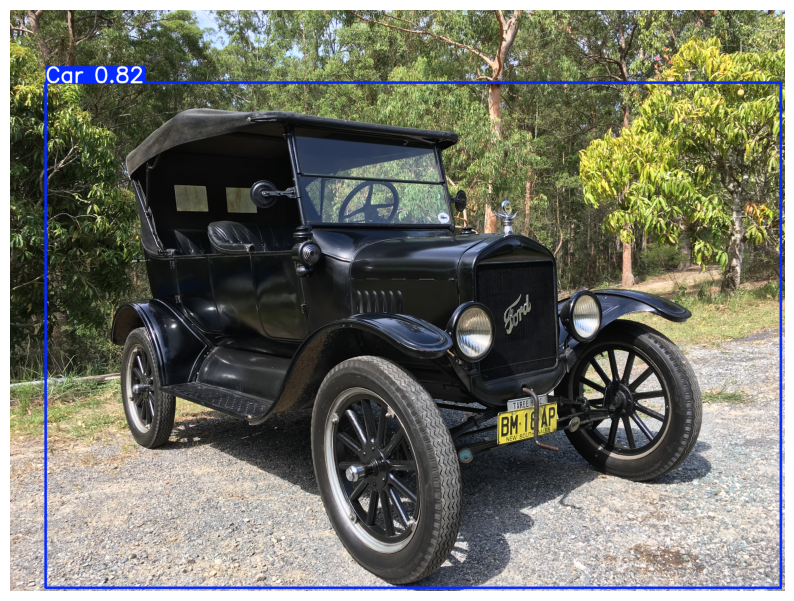

In [ ]:
import matplotlib.pyplot as plt
import cv2

annotated_img = results[0].plot()  # YOLO ne detect karke plot banaya
annotated_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(annotated_rgb)
plt.axis('off')
plt.show()


In [ ]:
class_names = model.names
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    print(f"Detected object: {class_names[cls_id]} | Confidence: {conf:.2f}")


Detected object: Car | Confidence: 0.82
